Second row of figure 6 of [Compound lensing: Einstein Zig-Zags and high multiplicity lensed images](http://adsabs.harvard.edu/abs/2016MNRAS.456.2210C), for the source at (0.15,0.07)

In [1]:
%matplotlib inline
import grale.plotutil as plotutil
import grale.lenses as lenses
import grale.feedback as feedback
import grale.images as images
from grale.cosmology import Cosmology
from grale.constants import *
from grale.multiplane import MultiImagePlane
import numpy as np
import matplotlib.pyplot as plt
import sys
import json

V = lambda x,y: np.array([x,y], dtype=np.double)
cosm = Cosmology(0.7, 0.3, 0, 0.7)

feedback.setDefaultFeedback("none")

In [2]:
zs = 10

zd = 0.1
coreRad = 0#U*1e-7
Dd = cosm.getAngularDiameterDistance(zd)
nsis = lenses.NSISLens(Dd, { "velocityDispersion": 190000, "coreRadius": coreRad })

zd2 = 0.9
Dd2 = cosm.getAngularDiameterDistance(zd2)
nsis2 = lenses.NSISLens(Dd2, { "velocityDispersion": 97000, "coreRadius": coreRad })

beta = (cosm.getAngularDiameterDistance(zd, zd2)*cosm.getAngularDiameterDistance(zs))/(
        cosm.getAngularDiameterDistance(zd2)*cosm.getAngularDiameterDistance(zd, zs))
print("beta", beta)
print("beta^-1", beta**-1)

alpha1 = nsis.getAlphaVector([1.0, 0.0])[0]*cosm.getAngularDiameterDistance(zd, zs)/cosm.getAngularDiameterDistance(zs)
alpha2 = nsis2.getAlphaVector([1.0, 0.0])[0]*cosm.getAngularDiameterDistance(zd2, zs)/cosm.getAngularDiameterDistance(zs)
print("alpha1 (arcsec)", alpha1/ANGLE_ARCSEC)
print("alpha2 (units of alpha1)", alpha2/alpha1)

U = alpha1


pos = V(0,0)*U
pos2 = V(0.2,0)*U

lens = lenses.CompositeLens(Dd, [{"lens": nsis, "x": pos[0], "y": pos[1], "angle": 0, "factor": 1}])
lens2 = lenses.CompositeLens(Dd2, [{"lens": nsis2, "x": pos2[0], "y": pos2[1], "angle": 0, "factor": 1}])



beta 0.902978165197307
beta^-1 1.1074464904491828
alpha1 (arcsec) 0.9949706639179734
alpha2 (units of alpha1) 0.18451582833704475


In [3]:
tr = V(1.5,1.5)*U
bl = V(-1.5,-1.5)*U

N = 1023
print(tr, bl)
print(U/ANGLE_ARCSEC)

lensInfo = { "lens": [ (lens, zd), (lens2, zd2) ], "bottomleft": bl, "topright": tr, "zs": zs, "numx": N, "numy": N }
plotutil.plotImagePlane(lensInfo, cosmology=cosm, angularUnit=U, axes=False, renderer="openmp");

[7.23563085e-06 7.23563085e-06] [-7.23563085e-06 -7.23563085e-06]
0.9949706639179734


{'bottomleft': array([-7.23563085e-06, -7.23563085e-06]),
 'imageplane': <grale.multiplane.MultiImagePlane at 0x7fad52d82198>,
 'lens': [(<grale.lenses.CompositeLens at 0x7fad784280f0>, 0.1),
  (<grale.lenses.CompositeLens at 0x7fad538846f0>, 0.9)],
 'lensplane': <grale.multiplane.MultiLensPlane at 0x7fad52d82208>,
 'numx': 1023,
 'numy': 1023,
 'topright': array([7.23563085e-06, 7.23563085e-06]),
 'zs': 10}

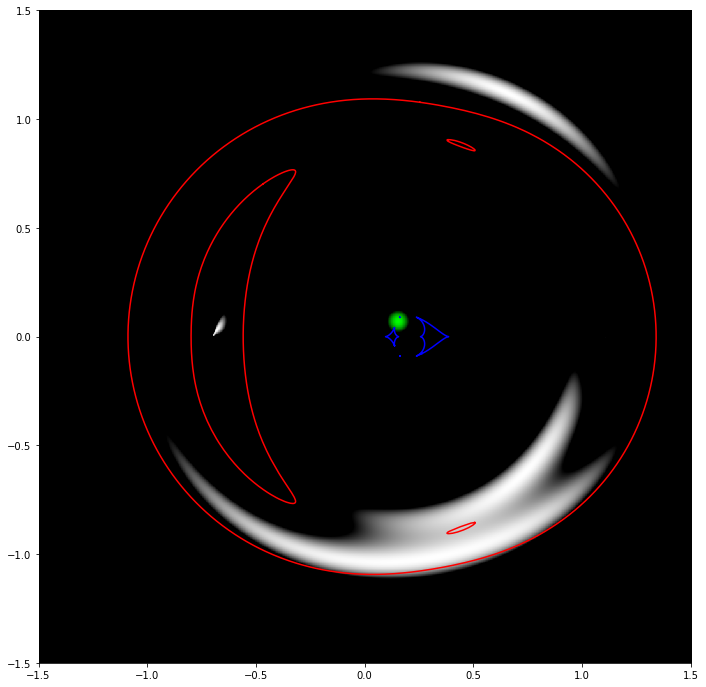

In [4]:
xpos, ypos = 0.15, 0.07
r = 0.05

src = images.CircularSource(V(xpos, ypos)*U, r*U, 1, True)
src2 = images.CircularSource(V(xpos, -ypos)*U, r*U, 1, True)
plt.figure(figsize=(12,12))
plotutil.plotImagePlane(lensInfo, cosmology=cosm, angularUnit=U, sources=[src]) #, src2]);
#plt.gca().set_xlim([-1,2])
#plt.gca().set_ylim([-1.5,1.5])